In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-01-18 12:37:59.163939'

In [167]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

In [168]:
CentralBasin_ERA5.describe()

,precip,cloud,evap,surf_runoff
count,5843.000000,5843.000000,5843.000000,5.843000e+03
mean,99.772923,0.618155,-62.983705,4.884588e+01
std,484.103188,0.289529,57.287175,1.143693e+03
min,0.000000,0.000000,-377.188548,-1.715295e-11
25%,0.733934,0.393686,-100.847492,2.450490e-02
50%,14.941845,0.670859,-51.374212,6.130995e-01
75%,89.705658,0.873095,-16.830158,4.936545e+00
max,14260.551278,1.000000,85.055069,4.411991e+04


In [161]:
for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > 0)

In [162]:
StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year
StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

StClair_ERA5['precip'] = StClair_ERA5['precip']*365
StClair_ERA5['evap'] = StClair_ERA5['evap']*365
StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,1798.131941,0.608203,7.095817,0.0
2003,2081.924523,0.593978,2.831309,0.0
2004,2023.147886,0.643415,13.617641,0.0
2005,1786.708852,0.586140,10.444519,0.0
2006,2276.376025,0.616976,13.023318,0.0
2007,2872.963013,0.556155,6.615705,0.0
2008,2302.392457,0.610614,23.932070,0.0
2009,3128.270338,0.618651,7.301404,0.0
2010,2522.561628,0.594625,5.588398,0.0


In [163]:
WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365
WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,5937.702655,0.605739,-6282.302726,3567.495945
2003,6880.812335,0.592266,-5733.283226,4447.115940
2004,6459.963551,0.635069,-5807.413360,5095.873650
2005,6236.066325,0.585562,-6166.729887,2610.809324
2006,7361.522397,0.614706,-6090.592387,4495.696484
2007,9602.993574,0.557169,-6387.471208,3781.383212
2008,7030.798268,0.601072,-6093.912441,6175.788264
2009,8879.188216,0.610738,-5921.393971,49380.757123
2010,8121.607162,0.580939,-6370.956459,3878.114998


In [164]:
CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365
CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,26373.416504,0.616855,-26858.351444,2869.603493
2003,31505.058650,0.609184,-22854.683161,5003.337020
2004,29585.394982,0.642891,-23317.177415,5674.627822
2005,28686.102733,0.593096,-24985.077746,2758.767418
2006,31779.145691,0.623875,-23935.888875,3587.338149
2007,39657.590218,0.573223,-25931.623414,2713.530690
2008,32731.808162,0.609876,-24875.825357,4632.195873
2009,39794.346961,0.617929,-23158.433606,32803.655602
2010,37797.061690,0.590138,-25728.379998,3566.986126


In [165]:
EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).sum()

EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365
EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365

EasternBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,6.333683e+06,230.452946,-5.537942e+06,3.609247e+06
2003,7.075646e+06,229.693266,-4.513304e+06,5.834385e+06
2004,7.478891e+06,239.901745,-4.736622e+06,6.766862e+06
2005,6.626246e+06,219.411138,-5.109732e+06,3.100136e+06
2006,7.668831e+06,229.925967,-4.843889e+06,4.944482e+06
2007,8.612047e+06,214.597649,-5.172090e+06,3.324730e+06
2008,7.913379e+06,229.173569,-5.114758e+06,4.210660e+06
2009,9.434756e+06,228.376693,-4.732668e+06,2.322470e+07
2010,8.912934e+06,219.496767,-5.256799e+06,3.733679e+06


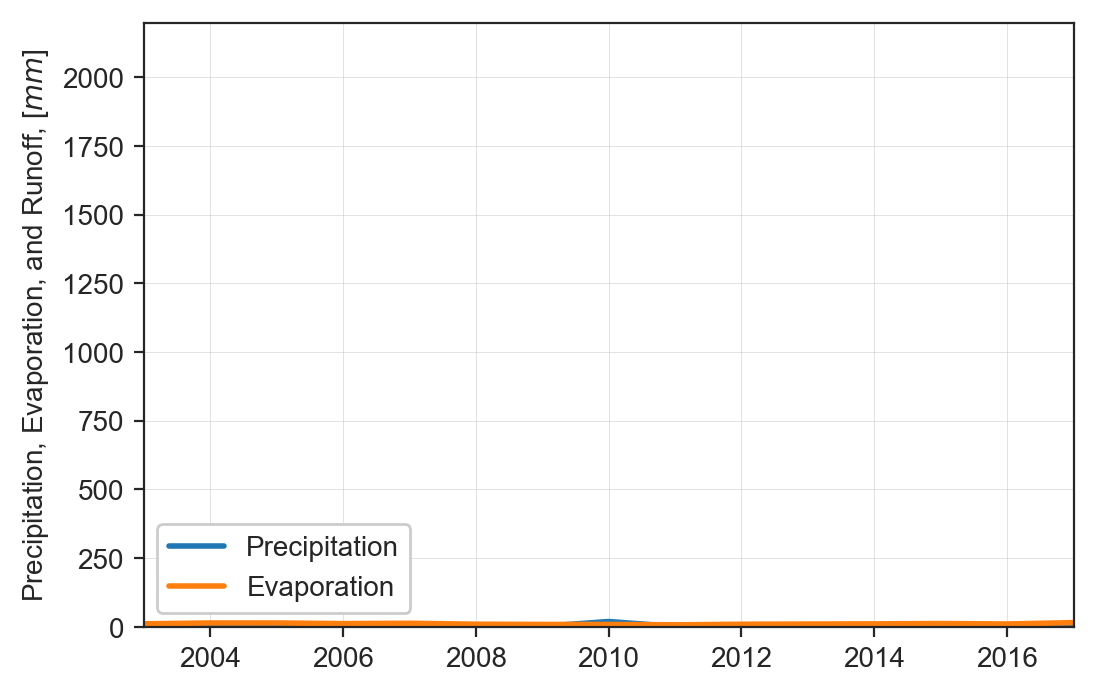

In [173]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, c=sns.color_palette()[0], lw=2)
axes.plot(StClair_ERA5.index, -StClair_ERA5.evap, c=sns.color_palette()[1], lw=2)
axes.set_xlabel('')
axes.grid(lw=0.2)

axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylabel('$mm$')
axes.set_ylabel('Precipitation, Evaporation, and Runoff, [$mm$]')


# ax2 = axes.twinx()

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

axes.legend(['Precipitation', 'Evaporation'], loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

axes.legend(['Precipitation', 'Evaporation'], loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

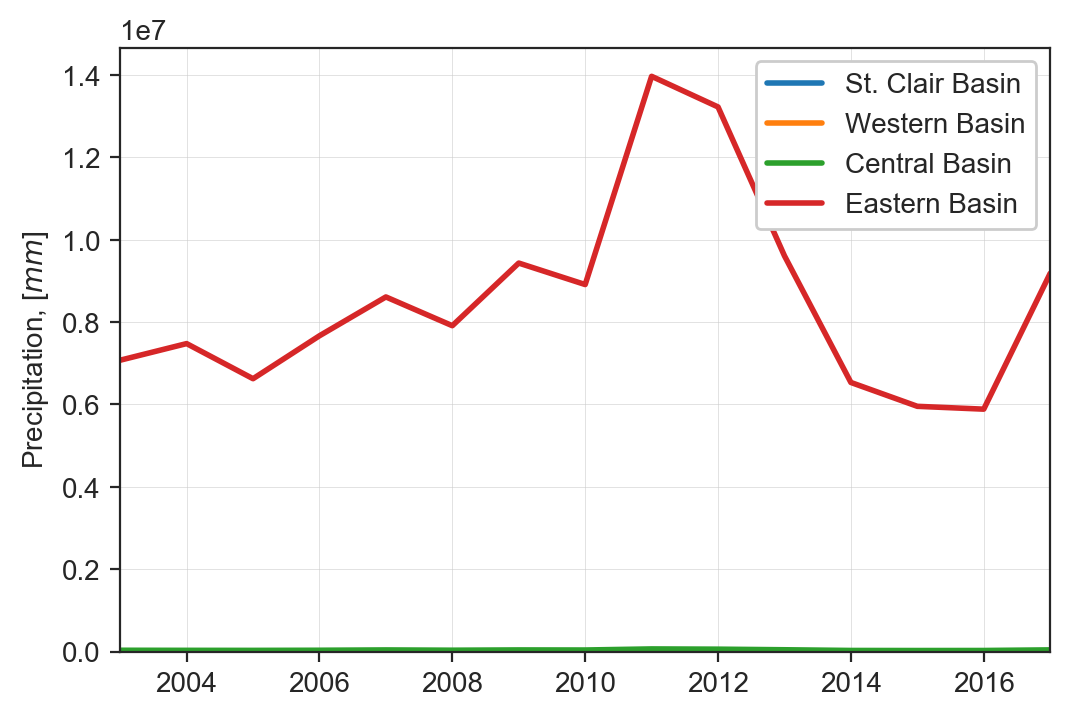

In [166]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, c=sns.color_palette()[0], lw=2, label='St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.precip, c=sns.color_palette()[1], lw=2, label='Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.precip, c=sns.color_palette()[2], lw=2, label='Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.precip, c=sns.color_palette()[3], lw=2, label='Eastern Basin')

axes.set_xlabel('')
axes.grid(lw=0.2)

axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylabel('$mm$')
axes.set_ylabel('Precipitation, [$mm$]')

axes.legend(loc=1, frameon=1, framealpha=1)


In [169]:
station_45005 = pd.read_csv('../../measurements/Excel Files/task 1/Mass Balance/station_45005.csv', skiprows=1)

In [170]:
station_45005['WSPD'] = pd.to_numeric(station_45005['WSPD'], errors='coerce')
station_45005['GST'] = pd.to_numeric(station_45005['GST'], errors='coerce')
station_45005['ATMP'] = pd.to_numeric(station_45005['ATMP'], errors='coerce')
station_45005['YY'] = pd.to_numeric(station_45005['YY'], errors='coerce')
station_45005=station_45005.groupby(['YY']).mean().reset_index()
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)
Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')
WindSpeed_Overlake = pd.read_excel('../../measurements/glerl/WindSpeed_Overlake.xlsx', sheetname='ERI', skiprows=3)
WindSpeed_Overlake['Annual'] = pd.to_numeric(WindSpeed_Overlake['Annual'], errors='coerce')
WindSpeed_Overlake['Year'] = pd.to_numeric(WindSpeed_Overlake['Year'], errors='coerce')



Text(0,0.5,'Precipitation, [$mm$]')

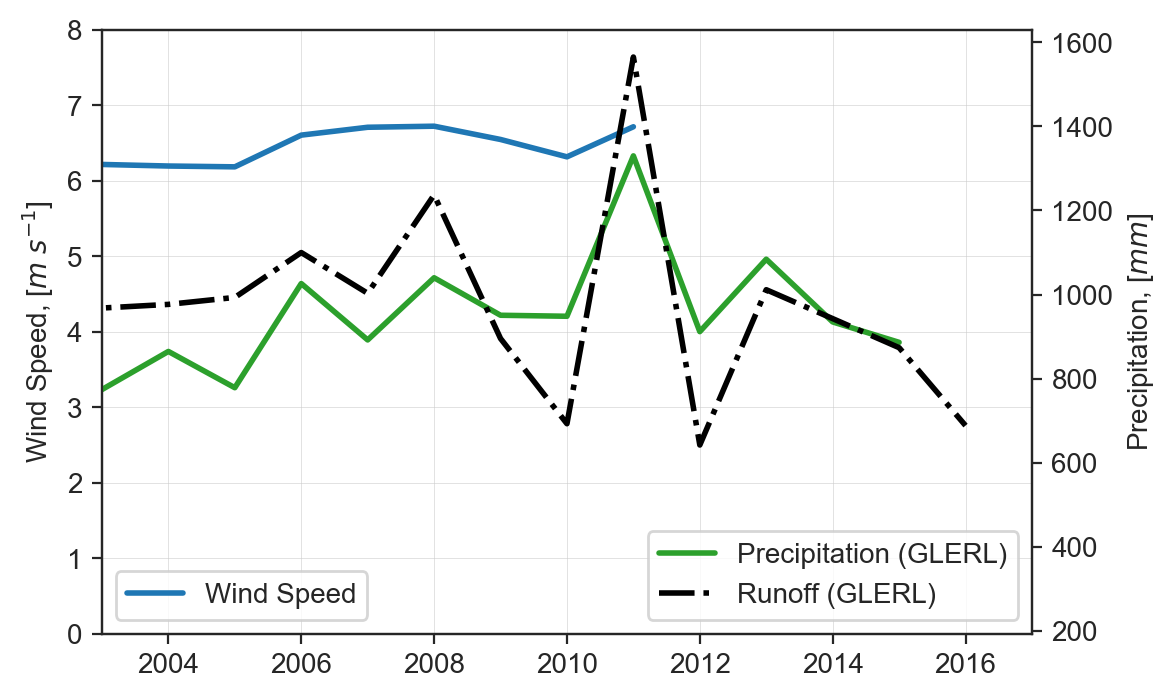

In [172]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# axes.plot(df.YY, df.WSPD, c=sns.color_palette()[0])
axes.plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2)
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes.plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
# axes.set_xlim(1950,2015)
#     ax.set_ylim(0,15)
axes.set_xlabel('')
axes.grid(lw=0.2)
ax2 = axes.twinx()
ax2.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[2], lw=2)
ax2.plot(Runoff_mm.YEAR, Runoff_mm.Ann, 'k-.', lw=2)
ax2.legend(['Precipitation (GLERL)', 'Runoff (GLERL)'], loc=4)
axes.legend(['Wind Speed'], loc=3)
# ax2.set_ylim(0,2000)
axes.set_ylim(0,8)
axes.set_xlim(2003,2017)
axes.set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
ax2.set_ylabel('Precipitation, [$mm$]')
# f.savefig('Mass Balance/wind_precip_1900.pdf')

In [181]:
WB = pd.read_excel('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/Total loads Cl.xlsx', sheet_name='Water Budget')
st_clair_basin = WB.iloc[7].values[1:-4]
st_clair_river = WB.iloc[38].values[1:-4]

st_clair_inflow = st_clair_basin + st_clair_river
detroit_river = WB.iloc[45].values[1:-4]
st_clair_inflow_cms = st_clair_inflow*1e9/365/24/3600
st_clair_river_cms = st_clair_river*1e9/365/24/3600
detroit_river_cms = detroit_river*1e9/365/24/3600




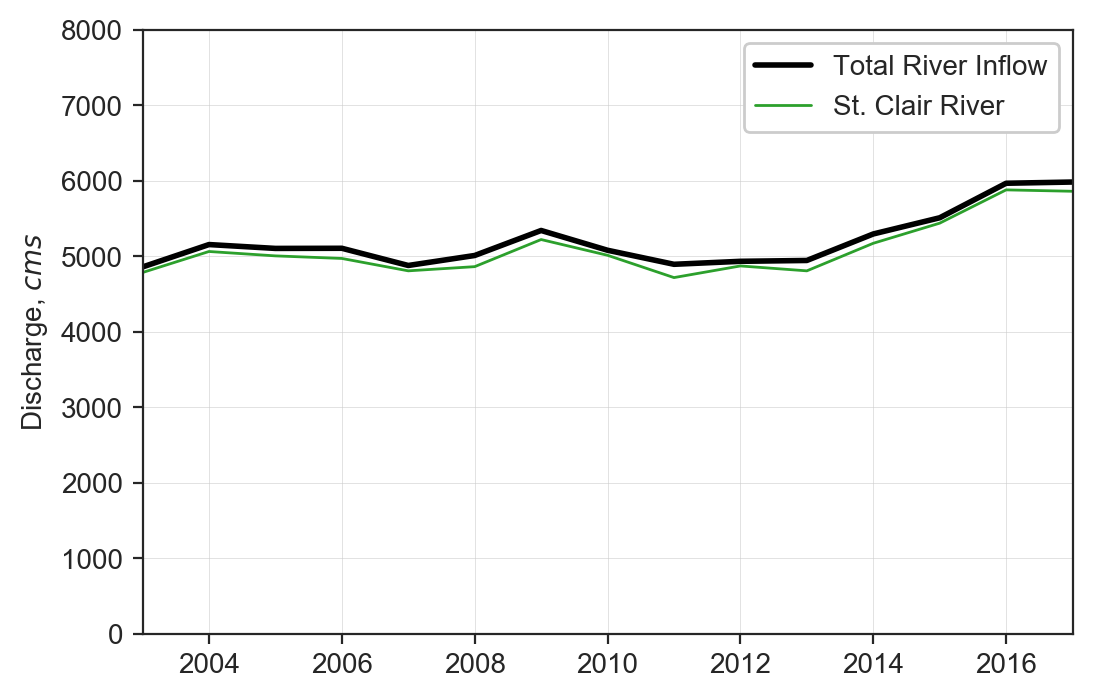

In [202]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(np.linspace(2003,2017,15), st_clair_inflow_cms, c='k', lw=2, label='Total River Inflow')
axes.plot(np.linspace(2003,2017,15), st_clair_river_cms, c=sns.color_palette()[2], lw=1, label='St. Clair River')
# axes.plot(np.linspace(2003,2017,15), detroit_river_cms, c=sns.color_palette()[2],  lw=1, label='Detroit River')

axes.set_xlabel('')
axes.grid(lw=0.2)

axes.set_ylim(0,8000)
axes.set_xlim(2003,2017)
axes.set_ylabel('$mm$')
axes.set_ylabel('Discharge, $cms$')

axes.legend(loc='best', frameon=1, framealpha=1)


In [205]:
np.mean(st_clair_river_cms/st_clair_inflow_cms)

0.9795872762744808